In [12]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import hstack

# Load dataset
# df_1 = pd.read_csv(r"C:/Users/archj/ML Project/Phising Email/may_work/phishing.xlsx")
# df_2 = pd.read_csv(r"C:\Users\may\Desktop\dataset/data.csv")
# df_3 = pd.read_csv(r"C:\Users\may\Desktop\dataset/balanced.csv")

# Replace this with your actual training data loading
train_df = pd.read_excel(r"../phishing.xlsx")

# Load test data
test_df = pd.read_excel(r"../phishing.xlsx")

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Text Cleaning Function
def clean_text(text):
    if not isinstance(text, str):
        text = str(text)
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\archj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         5

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



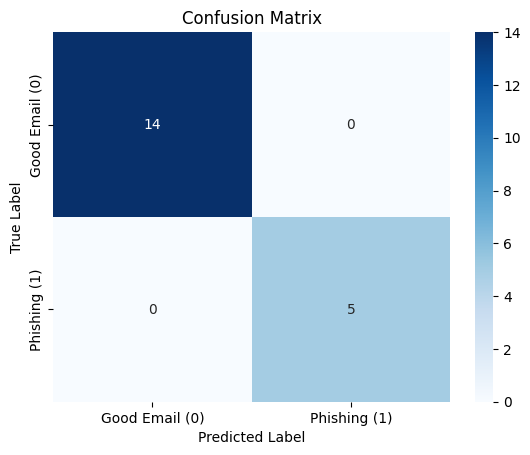

In [13]:
# Preprocess training data
train_df['cleaned_sender'] = train_df['sender'].apply(clean_text)
train_df['cleaned_subject'] = train_df['subject'].apply(clean_text)
train_df['cleaned_body'] = train_df['body'].apply(clean_text)

# Initialize vectorizers
tfidf_sender = TfidfVectorizer()
tfidf_subject = TfidfVectorizer()
tfidf_body = TfidfVectorizer()

# Fit vectorizers on training data
X_train_sender = tfidf_sender.fit_transform(train_df['cleaned_sender'])
X_train_subject = tfidf_subject.fit_transform(train_df['cleaned_subject'])
X_train_body = tfidf_body.fit_transform(train_df['cleaned_body'])

# Combine training features
X_train_combined = hstack((X_train_sender, X_train_subject, X_train_body))
y_train = train_df['label']

# Train a model (AdaBoost as per your code)
ada_model = AdaBoostClassifier()
ada_model.fit(X_train_combined, y_train)

# Preprocess test data
test_df['cleaned_sender'] = test_df['sender'].apply(clean_text)
test_df['cleaned_subject'] = test_df['subject'].apply(clean_text)
test_df['cleaned_body'] = test_df['body'].apply(clean_text)

# Transform test data using fitted vectorizers
X_test_sender = tfidf_sender.transform(test_df['cleaned_sender'])
X_test_subject = tfidf_subject.transform(test_df['cleaned_subject'])
X_test_body = tfidf_body.transform(test_df['cleaned_body'])

# Combine training features
X_train_combined = hstack((X_train_sender, X_train_subject, X_train_body))
y_train = train_df['label']

# Train a model (AdaBoost as per your code)
ada_model = AdaBoostClassifier()
ada_model.fit(X_train_combined, y_train)

# Preprocess test data
test_df['cleaned_sender'] = test_df['sender'].apply(clean_text)
test_df['cleaned_subject'] = test_df['subject'].apply(clean_text)
test_df['cleaned_body'] = test_df['body'].apply(clean_text)

# Transform test data using fitted vectorizers
X_test_sender = tfidf_sender.transform(test_df['cleaned_sender'])
X_test_subject = tfidf_subject.transform(test_df['cleaned_subject'])
X_test_body = tfidf_body.transform(test_df['cleaned_body'])

# Combine features
X_test_combined = hstack((X_test_sender, X_test_subject, X_test_body))

# Make predictions
test_df['predicted_label'] = ada_model.predict(X_test_combined)
test_df['phishing_probability'] = ada_model.predict_proba(X_test_combined)[:, 1]


# If you have true labels for evaluation
if 'label' in test_df.columns:
    print("Test Accuracy:", accuracy_score(test_df['label'], test_df['predicted_label']))
    print(classification_report(test_df['label'], test_df['predicted_label']))

    # Confusion Matrix
    cm = confusion_matrix(test_df['label'], test_df['predicted_label'])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Good Email (0)', 'Phishing (1)'], yticklabels=['Good Email (0)', 'Phishing (1)'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

# Show results
# print(test_df[['sender', 'subject', 'predicted_label', 'phishing_probability']].head())

# Save results with predictions
# test_df.to_excel(".xlsx", index=False)

Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         5

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\archj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


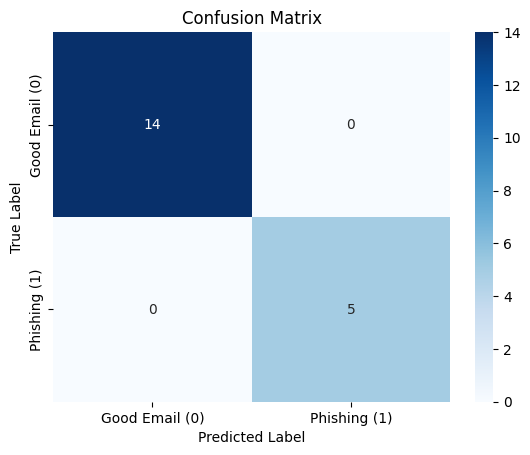

In [18]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import hstack

# Load and combine training datasets (uncomment your actual paths)
# df_1 = pd.read_csv("path/to/phishing.csv")
# df_2 = pd.read_csv("path/to/data.csv")
# df_3 = pd.read_csv("path/to/balanced.csv")
# train_df = pd.concat([df_1, df_2, df_3])

# For demonstration, assuming train_df is loaded properly
# Replace this with your actual training data loading
train_df = pd.read_excel(r"../phishing.xlsx")

# Load test data
test_df = pd.read_excel(r"../phishing.xlsx")

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Text Cleaning Function
def clean_text(text):
    if not isinstance(text, str):
        text = str(text)
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Preprocess training data
train_df['cleaned_sender'] = train_df['sender'].apply(clean_text)
train_df['cleaned_subject'] = train_df['subject'].apply(clean_text)
train_df['cleaned_body'] = train_df['body'].apply(clean_text)

# Initialize vectorizers
tfidf_sender = TfidfVectorizer()
tfidf_subject = TfidfVectorizer()
tfidf_body = TfidfVectorizer()

# Fit vectorizers on training data
X_train_sender = tfidf_sender.fit_transform(train_df['cleaned_sender'])
X_train_subject = tfidf_subject.fit_transform(train_df['cleaned_subject'])
X_train_body = tfidf_body.fit_transform(train_df['cleaned_body'])

# Combine training features
X_train_combined = hstack((X_train_sender, X_train_subject, X_train_body))
y_train = train_df['label']

# Train a model (AdaBoost as per your code)
ada_model = AdaBoostClassifier()
ada_model.fit(X_train_combined, y_train)

# Preprocess test data
test_df['cleaned_sender'] = test_df['sender'].apply(clean_text)
test_df['cleaned_subject'] = test_df['subject'].apply(clean_text)
test_df['cleaned_body'] = test_df['body'].apply(clean_text)

# Transform test data using fitted vectorizers
X_test_sender = tfidf_sender.transform(test_df['cleaned_sender'])
X_test_subject = tfidf_subject.transform(test_df['cleaned_subject'])
X_test_body = tfidf_body.transform(test_df['cleaned_body'])

# Combine test features
X_test_combined = hstack((X_test_sender, X_test_subject, X_test_body))

# Predict
test_df['predicted_label'] = ada_model.predict(X_test_combined)
test_df['phishing_probability'] = ada_model.predict_proba(X_test_combined)[:, 1]

# Evaluation (if test labels are available)
if 'label' in test_df.columns:
    print("Test Accuracy:", accuracy_score(test_df['label'], test_df['predicted_label']))
    print(classification_report(test_df['label'], test_df['predicted_label']))
    
    # Confusion Matrix
    cm = confusion_matrix(test_df['label'], test_df['predicted_label'])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=['Good Email (0)', 'Phishing (1)'], 
                yticklabels=['Good Email (0)', 'Phishing (1)'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

# Save results
test_df.to_excel("predictions.xlsx", index=False)